In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_csv("cardio_train.csv", delimiter = ";")

In [11]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


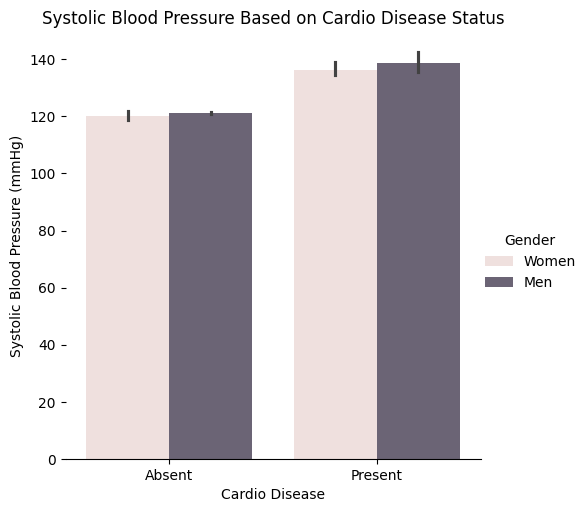

In [12]:
# Systolic Blood Pressure Bar Chart
g = sns.catplot(data = data.dropna(), kind="bar", x = "cardio",
               y = "ap_hi", hue="gender", alpha = 0.7)
g.despine(left=True)
g.set(xlabel="Cardio Disease", ylabel="Systolic Blood Pressure (mmHg)",
     title="Systolic Blood Pressure Based on Cardio Disease Status",
     xticklabels=["Absent", "Present"])
g._legend.set_title("Gender")
new_labels = ["Women", "Men"]
for t, l in zip(g._legend.texts, new_labels): #got this code from ChatGPT
   t.set_text(l)
g._legend.set_bbox_to_anchor([1.05, 0.5])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


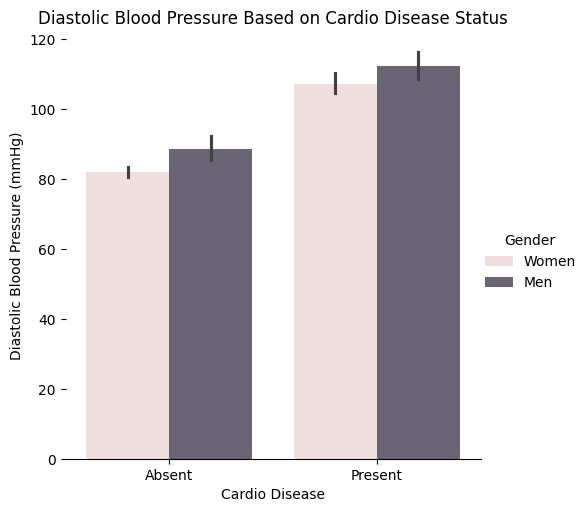

In [13]:
# Diastolic Blood Pressure Bar Chart
h = sns.catplot(data = data.dropna(), kind="bar", x = "cardio",
               y = "ap_lo", hue="gender", alpha = 0.7)
h.despine(left=True)
h.set(xlabel="Cardio Disease", ylabel="Diastolic Blood Pressure (mmHg)",
     title="Diastolic Blood Pressure Based on Cardio Disease Status",
     xticklabels=["Absent", "Present"])
h._legend.set_title("Gender")
new_labels = ["Women", "Men"]
for t, l in zip(h._legend.texts, new_labels): #got this code from ChatGPT
   t.set_text(l)
h._legend.set_bbox_to_anchor([1.05, 0.5])


In [32]:
# Loading in the dataframes
heart_disease = pd.read_excel("heart_disease.xlsx")
intensive = pd.read_excel("cardiac_intensive.xlsx")
rehab = pd.read_excel("cardiac_rehab.xlsx")
cardio_physicians = pd.read_excel("cardio_disease.xlsx")
urban = pd.read_excel("Urban vs Rural 2013 (1).xlsx")

# Renaming the Value columns in the Dataframes
heart_disease = heart_disease.rename(columns={'Value': 'heart_disease_death_rate'})
intensive = intensive.rename(columns={'Value': 'intensive_care_units'})
rehab = rehab.rename(columns={'Value': 'rehabilitation_units'})
cardio_physicians = cardio_physicians.rename(columns={'Value': 'cardiac_physicians'})
urban = urban.rename(columns={'Value': 'urban_status'})

# Dropping the Category_Range column
heart_disease = heart_disease.drop(columns=['Category Range'])
intensive = intensive.drop(columns=['Category Range'])
rehab = rehab.drop(columns=['Category Range'])
cardio_physicians = cardio_physicians.drop(columns=['Category Range'])
#urban = urban.drop(columns=['Category Range'])

heart_disease.head(5)

,County,State,heart_disease_death_rate
0,Summit,CO,38.3
1,Pitkin,CO,42.9
2,Eagle,CO,50.2
3,San Juan,WA,59.7
4,Valley,ID,63.6


In [33]:
# Creating the final dataframe for data collected from the Interactive Atlas

merge1 = pd.merge(heart_disease, intensive, how='outer', on=['County', 'State'])
merge2 = pd.merge(merge1, rehab, how='outer', on=['County', 'State'])
merge3 = pd.merge(merge2, cardio_physicians, how='outer', on=['County', 'State'])
final_df = pd.merge(merge3, urban, how='outer', on=['County', 'State'])

# Adding NAs
final_df.replace("Insufficient Data", np.nan, inplace=True)
final_df

,County,State,heart_disease_death_rate,intensive_care_units,rehabilitation_units,cardiac_physicians,urban_status
0,Abbeville,SC,176,0.0,0.0,NaN,4.0
1,Acadia,LA,254.9,0.0,0.0,NaN,3.0
2,Accomack,VA,217.1,0.0,0.0,NaN,4.0
3,Ada,ID,137.4,2.0,2.0,21.9,3.0
4,Adair,IA,184.2,1.0,1.0,NaN,4.0
...,...,...,...,...,...,...,...
3222,Yuma,AZ,130.7,1.0,1.0,16.4,3.0
3223,Yuma,CO,113.6,1.0,1.0,NaN,4.0
3224,Zapata,TX,127.7,0.0,0.0,NaN,4.0
3225,Zavala,TX,239.5,0.0,0.0,NaN,4.0


/var/folders/6s/14r4rcl133jbk1vcg2s1gxym0000gn/T/ipykernel_90583/4267121309.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set(xlabel='Metro Status', ylabel = "Heart Disease Death Rate per 100,000",


[Text(0.5, 0, 'Metro Status'),
 Text(0, 0.5, 'Heart Disease Death Rate per 100,000'),
 Text(0.5, 1.0, 'Heart Disease Death Rates per 100,000 by Urbanicity'),
 [Text(0, 0, 'Large Central'),
  Text(1, 0, 'Large Fringe'),
  Text(2, 0, 'Medium/small'),
  Text(3, 0, 'Nonmetro')]]

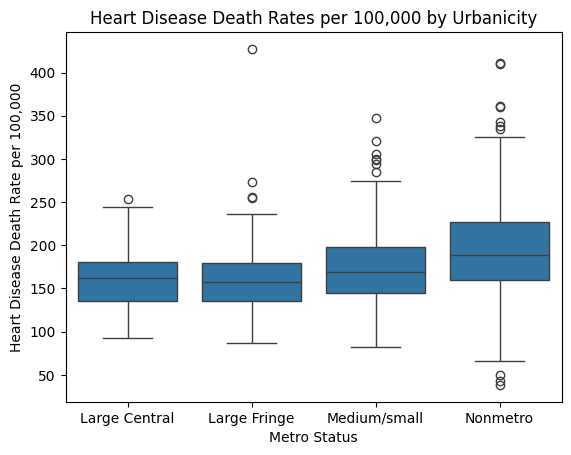

In [34]:
# Boxlpot with heart disease rate based on urban status
fig = sns.boxplot(final_df.dropna(), x='urban_status', y='heart_disease_death_rate')
fig.set(xlabel='Metro Status', ylabel = "Heart Disease Death Rate per 100,000",
       title="Heart Disease Death Rates per 100,000 by Urbanicity",
       xticklabels=["Large Central", "Large Fringe", "Medium/small", "Nonmetro"])

<Axes: >

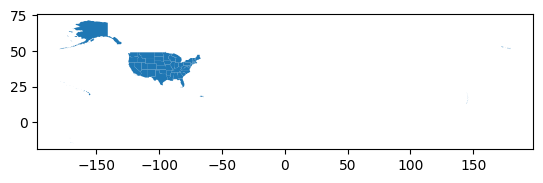

In [36]:
# Building geographic plot
import matplotlib.pyplot as plt
import geopandas as gpd
states = gpd.read_file('map/tl_2023_us_state.shp')
df = states.to_crs("EPSG:4326")
df.plot()


In [42]:
# This might be easier to use for the mapping

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly'

/var/folders/6s/14r4rcl133jbk1vcg2s1gxym0000gn/T/ipykernel_90583/2332045703.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set(xlabel='State', ylabel = "Heart Disease Death Rate per 100,000",


[Text(0.5, 24.0, 'State'),
 Text(24.000000000000007, 0.5, 'Heart Disease Death Rate per 100,000'),
 Text(0.5, 1.0, 'Heart Disease Death Rates per 100,000 by State'),
 [Text(0, 0, 'Large Central'),
  Text(1, 0, 'Large Fringe'),
  Text(2, 0, 'Medium/small'),
  Text(3, 0, 'Nonmetro')]]

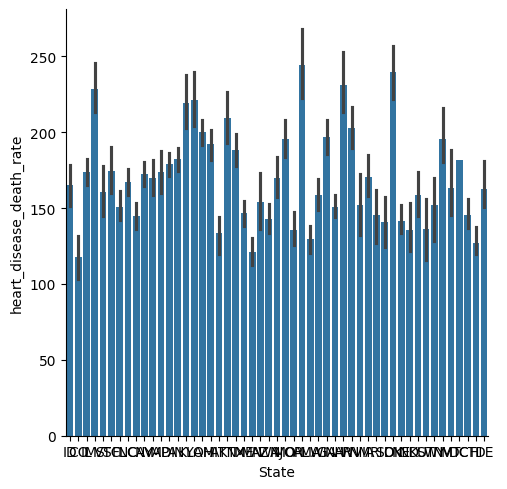

In [45]:
# heart disease deaths by urbanicity

u = sns.catplot(final_df.dropna(), kind="bar", x='State', y='heart_disease_death_rate')
fig.set(xlabel='State', ylabel = "Heart Disease Death Rate per 100,000",
       title="Heart Disease Death Rates per 100,000 by State",
       xticklabels=["Large Central", "Large Fringe", "Medium/small", "Nonmetro"])

In [ ]:
# Confidence Intervals
urban = final_df[final_df['urban_status'] == 1.0]
mu_u = np.mean(urban['heart_disease_death_rate'])
std_u = np.std(urban['heart_disease_death_rate'])
n_u = len(urban)

fringe = final_df[final_df['urban_status'] == 2.0]
mu_f = np.mean(fringe['heart_disease_death_rate'])
std_f = np.std(fringe['heart_disease_death_rate'])
n_f = len(fringe)

medium = final_df[final_df['urban_status'] == 3.0]
mu_m = np.mean(medium['heart_disease_death_rate'])
std_m = np.std(medium['heart_disease_death_rate'])
n_m = len(medium)

rural = final_df[final_df['urban_status'] == 4.0]
mu_r = np.mean(rural['heart_disease_death_rate'])
std_r = np.std(rural['heart_disease_death_rate'])
n_r = len(rural)

urban_interval = stats.norm.interval(confidence=0.95, loc=mu_u, scale=std_u/np.sqrt(n_u)) 
fringe_interval = stats.norm.interval(confidence=0.95, loc=mu_f, scale=std_f/np.sqrt(n_f)) 
medium_interval = stats.norm.interval(confidence=0.95, loc=mu_m, scale=std_m/np.sqrt(n_m)) 
rural_interval = stats.norm.interval(confidence=0.95, loc=mu_r, scale=std_r/np.sqrt(n_r))
print(urban_interval)
print(fringe_interval)
print(medium_interval)
print(rural_interval)


In [ ]:
# Hypothesis Test - cardiac_physicians

# Null Hypothesis: The mean number of cardiac physicians in rural and urban areas is the same.
# Alternative Hypothesis: The mean number of cardiac physicians is larger in urban than rural areas.

mean_urban = np.mean(urban['cardiac_physicians'])
std_urban = np.std(urban['cardiac_physicians'])
nobs_urban = len(urban)

mean_rural = np.mean(rural['cardiac_physicians'])
std_rural = np.std(rural['cardiac_physicians'])
nobs_rural = len(rural)


(stats.ttest_ind_from_stats(mean1=mean_urban, std1 = std_urban, nobs1 = nobs_urban,
                           mean2 = mean_rural, std2 = std_rural, nobs2 = nobs_rural)[1])/2

# Clear that this is significantly different with a very statistically significant p-value


In [ ]:
# Hypothesis Test -- rehabilitation_units

# Null Hypothesis: The mean number of rehabilitation  units in rural and urban areas is the same.
# Alternative Hypothesis: The mean number of rehabilitation units is larger in urban than rural areas.


mean_urban_rehab = np.mean(urban['rehabilitation_units'])
std_urban_rehab = np.std(urban['rehabilitation_units'])
nobs_urban_rehab = len(urban)

mean_rural_rehab = np.mean(rural['rehabilitation_units'])
std_rural_rehab = np.std(rural['rehabilitation_units'])
nobs_rural_rehab = len(rural)


(stats.ttest_ind_from_stats(mean1=mean_urban_rehab, std1 = std_urban_rehab, nobs1 = nobs_urban_rehab,
                           mean2 = mean_rural_rehab, std2 = std_rural_rehab, nobs2 = nobs_rural_rehab)[1])/2

In [ ]:
# Hypothesis Test Separating into Larger Groups

more_urban = final_df[final_df['urban_status'].isin([1.0, 2.0])]
more_rural = final_df[final_df['urban_status'].isin([3.0, 4.0])]


# Hypothesis Test - intensive_care_units

# Null Hypothesis: The mean number of intensive care  units in rural and urban areas is the same.
# Alternative Hypothesis: The mean number of intensive care units is larger in urban than rural areas.

mean_more_urban_rehab = np.mean(more_urban['rehabilitation_units'])
std_more_urban_rehab = np.std(more_urban['rehabilitation_units'])
nobs_more_urban_rehab = len(more_urban)

mean_more_rural_rehab = np.mean(more_rural['rehabilitation_units'])
std_more_rural_rehab = np.std(more_rural['rehabilitation_units'])
nobs_more_rural_rehab = len(more_rural)


(stats.ttest_ind_from_stats(mean1=mean_more_urban_rehab, std1 = std_more_urban_rehab, nobs1 = nobs_more_urban_rehab,
                           mean2 = mean_more_rural_rehab, std2 = std_more_rural_rehab, nobs2 = nobs_more_rural_rehab)[1])/2

 